# Supplementary Fig. 5a,b: PCA on repeat densities and repeat distribution.

In [5]:
import os

source_data_path = 'SourceData'
sup_fig_5 = 'Supplementary_Fig.5'
sup_fig_2 = 'Supplementary_Fig.2'
sup_fig_10 = 'Supplementary_Fig.10'
sup_fig_12 = 'Supplementary_Fig.12'

paths_files_fig_5 = os.path.join(source_data_path, sup_fig_5)
paths_files_fig_12 = os.path.join(source_data_path, sup_fig_12)

#input files:
recombination_rates_file = os.path.join(source_data_path, sup_fig_10, 'Xtropicalis_Recombination_Rates_Final.tsv')
chromosome_sizes_file = os.path.join(source_data_path, sup_fig_2, sup_fig_2+'a', 'All_Chr_lengths.tsv')
file_path_centrome_pos = os.path.join(source_data_path, sup_fig_2, sup_fig_2+'a', 'Xtr_centromeric_repeats.tsv')

repeat_masker_file = os.path.join(paths_files_fig_5, 'Xentr10__RM_withJCs.tsv')  ###Repeat masker file with JC metrics
repeat_motif_file  = os.path.join(paths_files_fig_5, 'Xentr10__RDpb_Motif.tsv')
repeat_classes_file = os.path.join(paths_files_fig_5, 'Xentr10__RDpb_Class.tsv')
species_table_file = os.path.join(paths_files_fig_5, 'Species_table_final.tsv')
classification_repeat_names_file = os.path.join(paths_files_fig_5, 'Repeat_Classification_table.tsv')
Density_Other_features_file = os.path.join(paths_files_fig_5, 'Xtropicalis.CTCF_Density_W1Mb_50Kb.tsv')
centurion_v4_file = os.path.join(paths_files_fig_5, 'Xtropicalis.centromeres.centurion.v4.tsv')
AB_compartments_eigenv_file = os.path.join(paths_files_fig_5, 'Xtropicalis.AB250kb.eigen.bedgraph')

#Setup out file:
out_dir_figs = paths_files_fig_5



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:



def load_all_chromosome_sizes(file_path, Spe_abr):
    chr_sizes = pd.read_csv(file_path,sep='\t')  
    if Spe_abr== '':
        chr_sizes =chr_sizes[chr_sizes.Abr=='Chr']
    else:
        chr_sizes =chr_sizes[chr_sizes.Abr==Spe_abr]
    return(chr_sizes)

def load_Densities(file_path):
    Motifs = pd.read_csv(file_path, sep='\t')
    Motifs = Motifs.fillna(0)
    return(Motifs)

#Dataframe for Chromosome sizes:
Specie_name = 'Xtropicalis'
chr_sizes_xtr = load_all_chromosome_sizes(chromosome_sizes_file, 'Xtr')
chr_sizes = chr_sizes_xtr#load_all_chromosome_sizes(chromosome_sizes, 'Xtr')

Xtrop_centromere_positon = pd.read_csv(file_path_centrome_pos,sep='\t') 

Rec_rate = pd.read_csv(recombination_rates_file, sep='\t')
Rec_rate.head()


Chr      Pos  delta_pos  delta_CC  Smooth_Genetic_distance  \
0  Chr1  4000000     500000  0.845459                 0.000000   
1  Chr1  4500000     500000  1.021646                 0.845459   
2  Chr1  5000000     500000  1.181592                 1.867105   
3  Chr1  5500000     500000  1.325296                 3.048697   
4  Chr1  6000000     500000  1.452757                 4.373993   

   Smooth_Recombination_Rate      Start Rec_rate     Chr domain   Chr domains  
0                   1.690918  4250000.0     High  p-Subtelomere  Subtelomeres  
1                   2.043293  4750000.0     High  p-Subtelomere  Subtelomeres  
2                   2.363184  5250000.0     High  p-Subtelomere  Subtelomeres  
3                   2.650591  5750000.0     High  p-Subtelomere  Subtelomeres  
4                   2.905515  6250000.0     High  p-Subtelomere  Subtelomeres

In [6]:
Specie_table = pd.read_csv(species_table_file,sep='\t')


# Load files:

Repeat_Maker_with_JC = pd.read_csv(repeat_masker_file, sep='\t')
Motifs = load_Densities(repeat_motif_file)
Classes = load_Densities(repeat_classes_file)
Motifs_and_Classes = pd.merge(Motifs,Classes)


Classifications = pd.read_csv(classification_repeat_names_file, sep='\t')
#Classifications = Classifications.fillna('')
#Classifications.loc[Classifications.Class=='SINE/tRNA-V','Type'] = 'SINE2'

Repeat_Maker_with_JC_withClass = pd.merge(Repeat_Maker_with_JC,Classifications, left_on='Class', right_on='Class' , how='left').sort_values(['Chr','Start','End'])
Repeat_Maker_with_JC_withClass = pd.merge(Repeat_Maker_with_JC,Classifications, left_on='Class', right_on='Class' , how='left').sort_values(['Chr','Start','End'])


Will be using the forllowing matrix to perform PCA:
3070 Repeats to be considered


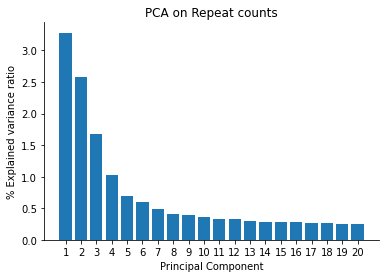

PC1       PC2       PC3       PC4  \
Satellite: Xtr-5_family-21         0.067308 -0.004067  0.050167 -0.082705   
Mariner/Tc1: DNA4_Xt              -0.058762 -0.056960  0.008727  0.022686   
CR1: CR1_1a_XT                    -0.046121  0.054199 -0.007309 -0.054113   
Unknown: Xbo-3_family-280          0.067965 -0.002136 -0.012788 -0.044985   
DNA/PIF-Harbinger: Xtr-1_family-7  0.021176 -0.014159  0.074692 -0.048931   

                                        PC5       PC6       PC7       PC8  \
Satellite: Xtr-5_family-21        -0.001130 -0.027635 -0.035428  0.016440   
Mariner/Tc1: DNA4_Xt               0.021771 -0.001740  0.018997 -0.008015   
CR1: CR1_1a_XT                     0.025694 -0.022768  0.045289 -0.003260   
Unknown: Xbo-3_family-280         -0.012604 -0.018379  0.011989 -0.011418   
DNA/PIF-Harbinger: Xtr-1_family-7  0.010617  0.033414 -0.032222  0.010864   

                                        PC9      PC10  ...      PC12  \
Satellite: Xtr-5_family-21         0.017465 -0.010321  ... -0.026826   
Mariner/Tc1: DNA4_Xt              -0.015804  0.016092  ...  0.004909   
CR1: CR1_1a_XT                    -0.003971  0.017565  ...  0.011445   
Unknown: Xbo-3_family-280         -0.036488  0.035167  ...  0.013649   
DNA/PIF-Harbinger: Xtr-1_family-7  0.026748 -0.067017  ...  0.021063   

                                       PC13      PC14      PC15      PC16  \
Satellite: Xtr-5_family-21         0.020306 -0.001381 -0.011733 -0.015293   
Mariner/Tc1: DNA4_Xt              -0.014996 -0.011539 -0.017620 -0.022129   
CR1: CR1_1a_XT                    -0.025029 -0.012880  0.014923  0.011719   
Unknown: Xbo-3_family-280          0.001383  0.026092 -0.000242 -0.016375   
DNA/PIF-Harbinger: Xtr-1_family-7  0.004179 -0.037278 -0.018671 -0.031906   

                                       PC17      PC18      PC19      PC20  \
Satellite: Xtr-5_family-21         0.024288  0.001472  0.001268 -0.018623   
Mariner/Tc1: DNA4_Xt               0.016865  0.008814 -0.005466  0.012828   
CR1: CR1_1a_XT                    -0.013600 -0.006830 -0.004766 -0.000353   
Unknown: Xbo-3_family-280         -0.017585 -0.005465 -0.020608 -0.001763   
DNA/PIF-Harbinger: Xtr-1_family-7  0.039488  0.035665  0.021625  0.005714   

                                   PC2_PC1combo  
Satellite: Xtr-5_family-21            -0.071375  
Mariner/Tc1: DNA4_Xt                   0.001801  
CR1: CR1_1a_XT                         0.100320  
Unknown: Xbo-3_family-280             -0.070101  
DNA/PIF-Harbinger: Xtr-1_family-7     -0.035334  

[5 rows x 21 columns]

In [7]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns



def natural_sort(l): 
    import re
    convert = lambda text: int(text) if text.isdigit() else text.lower() 
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(l, key = alphanum_key)

def get_natural_cubic_spline_model(x, y, minval=None, maxval=None, n_knots=None, knots=None):
#### For more information about the code: https://github.com/madrury/basis-expansions/blob/master/basis_expansions/basis_expansions.py
#### Thanks to: https://stackoverflow.com/questions/51321100/python-natural-smoothing-splines
    """
    Get a natural cubic spline model for the data.

    For the knots, give (a) `knots` (as an array) or (b) minval, maxval and n_knots.

    If the knots are not directly specified, the resulting knots are equally
    space within the *interior* of (max, min).  That is, the endpoints are
    *not* included as knots.

    Parameters
    ----------
    x: np.array of float
        The input data
    y: np.array of float
        The outpur data
    minval: float 
        Minimum of interval containing the knots.
    maxval: float 
        Maximum of the interval containing the knots.
    n_knots: positive integer 
        The number of knots to create.
    knots: array or list of floats 
        The knots.

    Returns
    --------
    model: a model object
        The returned model will have following method:
        - predict(x):
            x is a numpy array. This will return the predicted y-values.
    """

    if knots:
        spline = NaturalCubicSpline(knots=knots)
    else:
        spline = NaturalCubicSpline(max=maxval, min=minval, n_knots=n_knots)

    p = Pipeline([
        ('nat_cubic', spline),
        ('regression', LinearRegression(fit_intercept=True))
    ])

    p.fit(x, y)

    return p


class AbstractSpline(BaseEstimator, TransformerMixin):
    """Base class for all spline basis expansions."""

    def __init__(self, max=None, min=None, n_knots=None, n_params=None, knots=None):
        if knots is None:
            if not n_knots:
                n_knots = self._compute_n_knots(n_params)
            knots = np.linspace(min, max, num=(n_knots + 2))[1:-1]
            max, min = np.max(knots), np.min(knots)
        self.knots = np.asarray(knots)

    @property
    def n_knots(self):
        return len(self.knots)

    def fit(self, *args, **kwargs):
        return self


class NaturalCubicSpline(AbstractSpline):
    """Apply a natural cubic basis expansion to an array.
    The features created with this basis expansion can be used to fit a
    piecewise cubic function under the constraint that the fitted curve is
    linear *outside* the range of the knots..  The fitted curve is continuously
    differentiable to the second order at all of the knots.
    This transformer can be created in two ways:
      - By specifying the maximum, minimum, and number of knots.
      - By specifying the cutpoints directly.  

    If the knots are not directly specified, the resulting knots are equally
    space within the *interior* of (max, min).  That is, the endpoints are
    *not* included as knots.
    Parameters
    ----------
    min: float 
        Minimum of interval containing the knots.
    max: float 
        Maximum of the interval containing the knots.
    n_knots: positive integer 
        The number of knots to create.
    knots: array or list of floats 
        The knots.
    """

    def _compute_n_knots(self, n_params):
        return n_params

    @property
    def n_params(self):
        return self.n_knots - 1

    def transform(self, X, **transform_params):
        X_spl = self._transform_array(X)
        if isinstance(X, pd.Series):
            col_names = self._make_names(X)
            X_spl = pd.DataFrame(X_spl, columns=col_names, index=X.index)
        return X_spl

    def _make_names(self, X):
        first_name = "{}_spline_linear".format(X.name)
        rest_names = ["{}_spline_{}".format(X.name, idx)
                      for idx in range(self.n_knots - 2)]
        return [first_name] + rest_names

    def _transform_array(self, X, **transform_params):
        X = X.squeeze()
        try:
            X_spl = np.zeros((X.shape[0], self.n_knots - 1))
        except IndexError: # For arrays with only one element
            X_spl = np.zeros((1, self.n_knots - 1))
        X_spl[:, 0] = X.squeeze()

        def d(knot_idx, x):
            def ppart(t): return np.maximum(0, t)

            def cube(t): return t*t*t
            numerator = (cube(ppart(x - self.knots[knot_idx]))
                         - cube(ppart(x - self.knots[self.n_knots - 1])))
            denominator = self.knots[self.n_knots - 1] - self.knots[knot_idx]
            return numerator / denominator

        for i in range(0, self.n_knots - 2):
            X_spl[:, i+1] = (d(i, X) - d(self.n_knots - 2, X)).squeeze()
        return X_spl
    
    
    
print("Will be using the forllowing matrix to perform PCA:")
list_of_repeats_select=Motifs_and_Classes.columns.to_list()[2:]
print(len(list_of_repeats_select), "Repeats to be considered")

Chr_ = 'All Chromosomes'

n_components = 20
x = StandardScaler().fit_transform(Motifs_and_Classes[list_of_repeats_select ].astype(float))
pca_list = list(pd.Series(zip(n_components*['PC'],range(1,n_components+1))).apply(lambda x: ''.join(map(str,x))))
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = pca_list)
principalDf['Chr'] = Motifs_and_Classes.Chr.tolist()
principalDf['Start'] = Motifs_and_Classes.Start.tolist()


fig, ax = plt.subplots()
ax.bar(list(map(str,np.arange(1,21,1))),pca.explained_variance_ratio_*100)
plt.title('PCA on Repeat counts')
plt.ylabel('% Explained variance ratio')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.xlabel('Principal Component')
#fig_name=''.join((out_dir,Abr_Sp,'_PCA_explainedVar.png'))
#print "Saved as: ", fig_name
#plt.savefig(fig_name, bbox_inches='tight' ) 

plt.show()



n_knots = 40
for Chr_ in natural_sort(chr_sizes.Chr.to_list()):    
    x = np.array(principalDf[principalDf.Chr==Chr_].Start.to_list())
    y = np.array((principalDf[principalDf.Chr==Chr_].PC1).to_list())
    model_pca1 = get_natural_cubic_spline_model(x, y, 0, int(chr_sizes[chr_sizes.Chr==Chr_].Length), n_knots=n_knots)
    y_est_pca1 = model_pca1.predict(x)
    y = np.array((principalDf[principalDf.Chr==Chr_].PC2).to_list())
    model_pca2 = get_natural_cubic_spline_model(x, y, 0, int(chr_sizes[chr_sizes.Chr==Chr_].Length), n_knots=n_knots)
    y_est_pca2 = model_pca2.predict(x)
    lim = np.median(y_est_pca2) + 1.7 *y_est_pca2.std()    
    model_pca3 = get_natural_cubic_spline_model(x, np.array((principalDf[principalDf.Chr==Chr_].PC3).to_list()), 0, int(chr_sizes[chr_sizes.Chr==Chr_].Length), n_knots=n_knots)
    y_est_pca3 = model_pca3.predict(x)
    
    
    above_line    = True
    point_to_keep = []
    postion_chr   = []
    chr_structure = dict()
    chr_structure_list = ['Subtelomere-p' , 'Peri-Centromere', 'Subtelomere-q']
    chr_struct_arr = []
    enum = 0
    for i in range(0, len(y_est_pca2)):
        chr_structure[i] = 'Arm'
        pca2_value = y_est_pca2[i]
        if pca2_value - lim >= 0:
            chr_structure[i] = 'Arm'
            chr_structure_name = str(chr_structure_list[enum])
        if pca2_value - lim > 0:
            chr_structure[i] = chr_structure_name
            above_line = True
            point_to_keep.append(i)
            if len(point_to_keep)>1:
                if (point_to_keep[-1] - point_to_keep[-2] )>1:
                    enum = enum + 1
                    chr_structure[i] = chr_structure_list[enum]
        chr_struct_arr.append(chr_structure[i])
    
    principalDf.loc[principalDf.Chr==Chr_, 'REGION_PCA2'] = list(chr_struct_arr)
    principalDf.loc[principalDf.Chr==Chr_, 'y_est_PCA1'] = list(y_est_pca1)
    principalDf.loc[principalDf.Chr==Chr_, 'y_est_PCA2'] = list(y_est_pca2)
    principalDf.loc[principalDf.Chr==Chr_, 'y_est_PCA3'] = list(y_est_pca3)
principalDf.head() 

principalDf['Arm'] = principalDf.REGION_PCA2.apply(lambda x: 'Arm' if x=='Arm' else 'No-Arm')
principalDf['Centromere'] = principalDf.REGION_PCA2.apply(lambda x: 'Centromere' if x=='Peri-Centromere' else 'Arm')
principalDf['Subtelomere'] =  principalDf.REGION_PCA2.apply(lambda x: 'Subtelomere' if 'Subtelomere' in x else 'Arm')


PCA_component_loadings = pd.DataFrame(index = list_of_repeats_select)
for i in range(0,n_components):
    PCA_component_loadings.loc[:,''.join(('PC',str(i+1)))] =  pca.components_[i]
PCA_component_loadings['PC2_PC1combo'] =  PCA_component_loadings.PC1*-1 + PCA_component_loadings.PC2
PCA_component_loadings.sort_values('PC2_PC1combo',ascending=False).head()
principalDf['PC2_PC1combo'] =  principalDf.PC1*-1 + principalDf.PC2
PCA_component_loadings.head()


In [8]:
Centurion4 = pd.read_csv(centurion_v4_file,sep='\t', names=['Chr','Centurion','A','B','C'])
#Centurion4 = pd.read_csv(Specie_table.loc[4]['Centurion'].replace('*','v4'),sep='\t', names=['Chr','Centurion','A','B','C'], comment='#')
#HiC_AB_Eigen = pd.read_csv(Specie_table.loc[4]['Compartments_eigen'], sep='\t', names=['Chr','Start','End','Eigenvalue'])


HiC_AB_Eigen = pd.read_csv(AB_compartments_eigenv_file, sep='\t', names=['Chr','Start','End','Eigenvalue'])

HiC_AB_Eigen['Midpoint'] = 250000/2 + HiC_AB_Eigen.Start

In [9]:
Mb = 1000000
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline

principalDf['Midpoint'] =principalDf.Start +Mb/2

array_PC3_ = []
array_HiC_ = []
for Chr_ in chr_sizes.Chr.to_list(): 
    
    cs = CubicSpline(principalDf[principalDf.Chr==Chr_].Midpoint, principalDf[principalDf.Chr==Chr_].PC3)
    y2 = cs(HiC_AB_Eigen[HiC_AB_Eigen.Chr==Chr_].Start)
        
    print(Chr_, np.corrcoef(y2,HiC_AB_Eigen[HiC_AB_Eigen.Chr==Chr_].Eigenvalue)[0][1])
    
    array_PC3_.extend(y2)
    array_HiC_.extend(list(HiC_AB_Eigen[HiC_AB_Eigen.Chr==Chr_].Eigenvalue))

print("Correlation between PC3 and HiC eigenvalues")
np.corrcoef(array_PC3_,array_HiC_)
#len(array_PC3_),len(array_HiC_)

Chr1 -0.6398997437701172
Chr2 -0.7085167188167227
Chr3 -0.6067686227970396
Chr4 -0.6598583553978096
Chr5 -0.6488992294232745
Chr6 -0.5927736901053596
Chr7 -0.652750569862658
Chr8 -0.5976081557827206
Chr9 -0.5166758485700685
Chr10 -0.629715123752232
Correlation between PC3 and HiC eigenvalues


array([[ 1.        , -0.63468402],
       [-0.63468402,  1.        ]])

In [10]:
HiC_AB_Eigen['AB'] = HiC_AB_Eigen.Eigenvalue.apply(lambda x: 1 if x>0 else 0) 
HiC_AB_Eigen['PC3'] = pd.Series(array_PC3_) 
HiC_AB_Eigen['PC3sig'] = pd.Series(array_PC3_).apply(lambda x: 1 if x>0 else 0)
HiC_AB_Eigen.head()

Chr    Start      End  Eigenvalue   Midpoint  AB       PC3  PC3sig
0  Chr1        0   250000    0.044568   125000.0   1 -9.511059       0
1  Chr1   250000   500000    0.104389   375000.0   1 -4.432746       0
2  Chr1   500000   750000    0.031099   625000.0   1 -1.171203       0
3  Chr1   750000  1000000   -0.029750   875000.0   0  1.610457       1
4  Chr1  1000000  1250000   -0.101634  1125000.0   0  5.186548       1

In [11]:
Pericentromere_Ranges = principalDf[principalDf.Centromere=='Centromere'].groupby('Chr').Start.aggregate(['min','max']).reset_index()
Pericentromere_Ranges = pd.merge(chr_sizes,Pericentromere_Ranges, left_on='Chr', right_on='Chr')
Pericentromere_Ranges['PeriCentromere size'] = Pericentromere_Ranges['max']-Pericentromere_Ranges['min']
Pericentromere_Ranges


Abr    Chr     Length       min       max  PeriCentromere size
0  Xtr   Chr1  217471166  85200000  93200000              8000000
1  Xtr   Chr2  181034961  62800000  70400000              7600000
2  Xtr   Chr3  153873357  13400000  16600000              3200000
3  Xtr   Chr4  153961319  42400000  49600000              7200000
4  Xtr   Chr5  164033575  57400000  65000000              7600000
5  Xtr   Chr6  154486312  69200000  77400000              8200000
6  Xtr   Chr7  133565930  54800000  62800000              8000000
7  Xtr   Chr8  147241510  15800000  21000000              5200000
8  Xtr   Chr9   91218944  40200000  46000000              5800000
9  Xtr  Chr10   52432566  19400000  21200000              1800000

In [12]:
OtherFeatures  = pd.read_csv(Density_Other_features_file,sep='\t')
motif_names = dict(zip(OtherFeatures.columns[2:],['Rec_hotspot','CTCF_Hashimoto','Cohesin','CpG','CCCCCCC','CTCTCCC','CpG_ctrl','GC_','AT_','N']))
OtherFeatures =  OtherFeatures.rename(columns=motif_names)


#CM_PC variable referse to the Dataframe that contains Classes, Motifs and Principal Components.
CM_PC = pd.merge(Motifs_and_Classes, principalDf,  left_on=['Chr','Start'],   right_on=['Chr','Start'])
#CM_PC variable referse to the Dataframe that contains Classes, Motifs and Principal Components and Other  motif features
CM_PC_OF = pd.merge(CM_PC, OtherFeatures,  left_on=['Chr','Start'],   right_on=['Chr','position'])
CM_PC_OF['Centromere'] = CM_PC_OF.REGION_PCA2.apply(lambda x: 'Centromere' if x=='Peri-Centromere' else 'Arm')
CM_PC_OF['Subtelomere'] =  CM_PC_OF.REGION_PCA2.apply(lambda x: 'Subtelomere' if 'Subtelomere' in x else 'Arm')
CM_PC_OF['Arm'] = CM_PC_OF.REGION_PCA2.apply(lambda x: 'Arm' if 'Arm' in x else 'No-Arm')
CM_PC_OF.head()


Chr   Start  Satellite: Xtr-5_family-21  Mariner/Tc1: DNA4_Xt  \
0  Chr1       0                       15443                    80   
1  Chr1  200000                       18137                     0   
2  Chr1  400000                       19547                    49   
3  Chr1  600000                       21901                   188   
4  Chr1  800000                       13099                   188   

   CR1: CR1_1a_XT  Unknown: Xbo-3_family-280  \
0            2990                          0   
1            4139                          0   
2            7943                          0   
3            7748                          0   
4            7497                          0   

   DNA/PIF-Harbinger: Xtr-1_family-7  hAT: hAT-10_XT  \
0                                  0            8859   
1                               1085           10831   
2                               2016           11782   
3                               2016           11796   
4                               2016            3351   

   Helitron: Helitron-N1A_XT  DNA/TcMar-Tigger: Xtr-4_family-702  ...  \
0                       3235                                  83  ...   
1                       3235                                  83  ...   
2                          0                                   0  ...   
3                          0                                 185  ...   
4                          0                                 362  ...   

   Rec_hotspot  CTCF_Hashimoto  Cohesin    CpG  CCCCCCC  CTCTCCC  CpG_ctrl  \
0          395              22       30  35240     1384      859    102056   
1          379              26       32  33310     1277      765    100266   
2          272              23       28  28428      665      252     95230   
3          241              23       24  25746      412      554     94616   
4          198              20       18  24052      241      874     93630   

      GC_     AT_     N  
0  504471  492529  6000  
1  492298  505702  4000  
2  469398  529602  2000  
3  454034  544966  2000  
4  438812  561188     0  

[5 rows x 3112 columns]

Saved as SourceData/Xtropicalis_Final_PC1.pdf


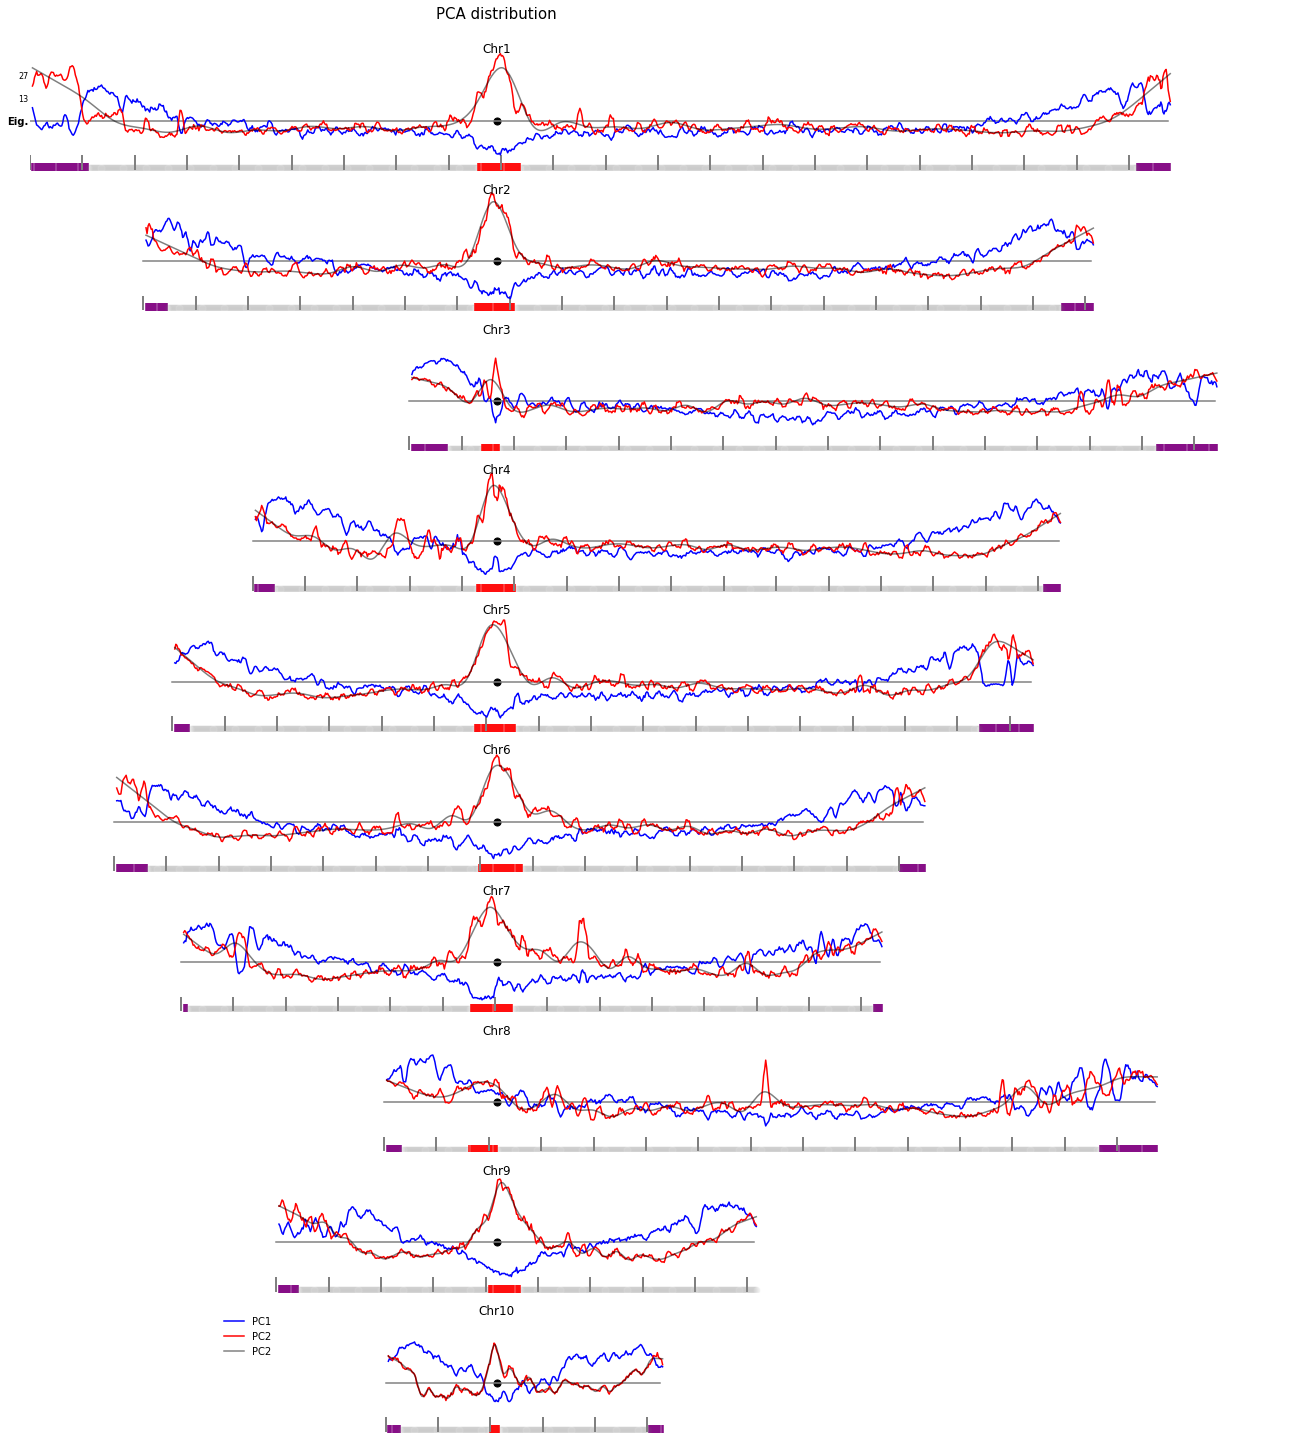

Saved as SourceData/Xtropicalis_Final_PC3.pdf


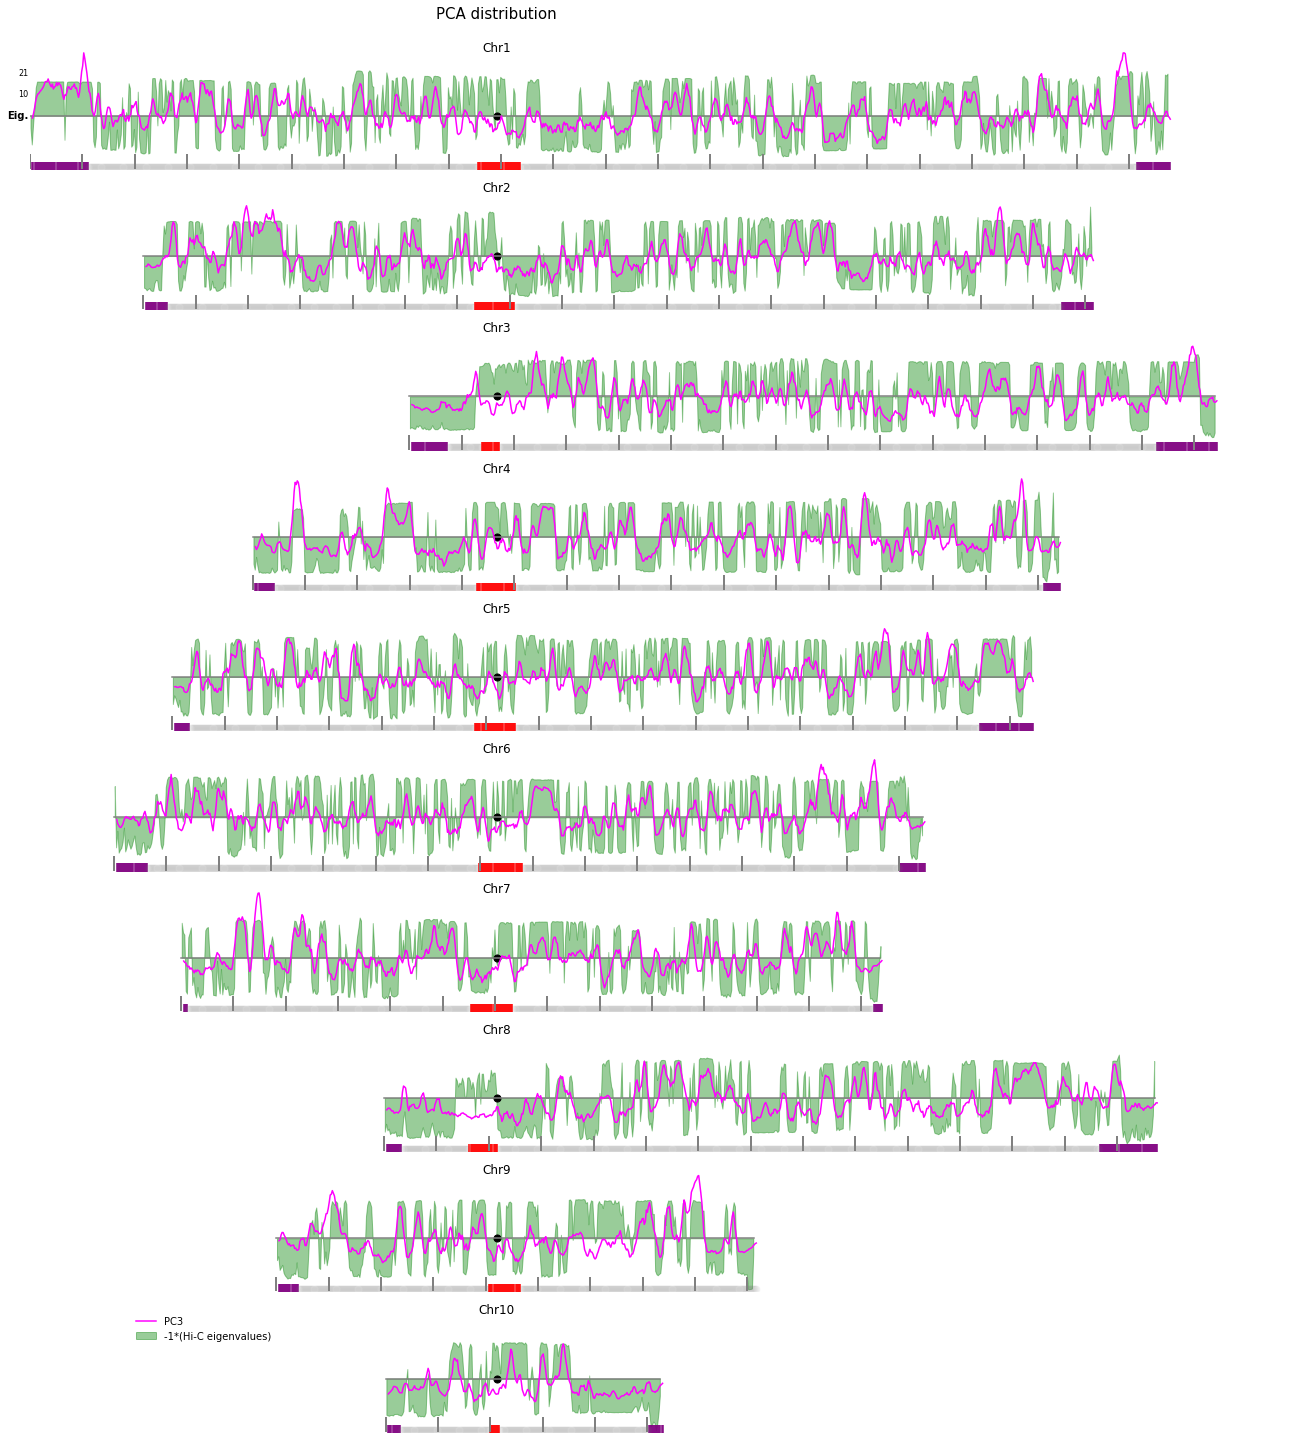

SourceData/Supplementary_Fig.5/Panels_AB_PC1-2-3.csv


In [13]:
#Supplementary Figure 5A,B

def spatial_distibution_repeats_byPCA(Density_df, motifs_to_plot, Motif_color_dict, Xtrop_centromere_positon,Chr_sizes, title, max_y_value, out_fig_name, Rec_rate):
    Mb = 1000000
    if title == '':
        title = 'PCA distribution'
        
    list_chromosomes = Chr_sizes.Chr.tolist()
    CTR_pos_Chr1 = list(Xtrop_centromere_positon[Xtrop_centromere_positon.Chr=='Chr1'].TandemRepeats)[0]
    Largest_chr_len = float(Chr_sizes.Length.max())*1.1
    
    if max_y_value == '':
        max_axis = principalDf[motifs_to_plot].max().max()
        min_axis = principalDf[motifs_to_plot].min().min()
        max_y_value = principalDf[motifs_to_plot].max().max()
    
    counter = 0
    fig, axs = plt.subplots(len(list_chromosomes), figsize=(18,2*len(list_chromosomes)))
    
    for Chr_ in list_chromosomes:
        
        To_plot = principalDf[principalDf.Chr==Chr_]
        Chr_size_ = list(Chr_sizes[Chr_sizes.Chr==Chr_].Length)[0]
        CTR_pos = list(Xtrop_centromere_positon[Xtrop_centromere_positon.Chr==Chr_].TandemRepeats)[0]
        delta_centromere = CTR_pos_Chr1 - CTR_pos
        CTR_pos_normalized =(CTR_pos+delta_centromere)/Largest_chr_len
        chr_size_normalized = (Chr_size_+delta_centromere)/Largest_chr_len
        
        axs[counter].set_xlim((0, 1))
        axs[counter].set_ylim((min_axis*1.3, max_axis*1.1))
        axs[counter].text((CTR_pos+delta_centromere)/Largest_chr_len, max_axis, Chr_, fontsize=12, horizontalalignment='center')
        axs[counter].axhline(0,xmin=delta_centromere/Largest_chr_len, xmax=chr_size_normalized, color='gray')
        #axs[counter].axvline((Centurion4[Centurion4.Chr==Chr_].Centurion.to_list()[0]+delta_centromere)/Largest_chr_len, linestyle=':',linewidth=2.5, color='black')

        for tick_10Mb in range(0, Chr_size_, 10*Mb):
            normalized_tick = (tick_10Mb  +delta_centromere)/Largest_chr_len  
            axs[counter].axvline(normalized_tick, ymin=-.1, ymax= .11,  alpha=1, color='gray', linewidth=2)
            
        x_positon = To_plot['Start'] + Mb/2 + delta_centromere
        x_positon_normalized = (x_positon)/Largest_chr_len
        for repeat_name in motifs_to_plot :
            if (repeat_name == 'PC1') | (repeat_name == 'PC3') | (repeat_name == 'PC2'): 
                axs[counter].plot(x_positon_normalized, To_plot[repeat_name].astype(float),  color= Motif_color_dict[repeat_name],label=repeat_name )
            if repeat_name == 'PC2':
                lim = np.median(To_plot['y_est_PCA2'].astype(float)) + 1.7 *To_plot['y_est_PCA2'].astype(float).std()    
                axs[counter].plot(x_positon_normalized, To_plot['y_est_PCA2'].astype(float),  color= 'black',label=repeat_name, alpha=0.5 )
                #axs[counter].axhline(lim, color='red',xmin=delta_centromere/Largest_chr_len,xmax=chr_size_normalized, linestyle = '-.',linewidth=1, alpha=0.75)
            if repeat_name == 'PC3':
                x_positon_hiCeig =HiC_AB_Eigen[HiC_AB_Eigen.Chr==Chr_]['Midpoint'] +delta_centromere
                x_positon_hiCeig_normalized  = x_positon_hiCeig/Largest_chr_len
                axs[counter].fill_between(x_positon_hiCeig_normalized, -.8*max_axis*HiC_AB_Eigen[HiC_AB_Eigen.Chr==Chr_]['Eigenvalue']/max(HiC_AB_Eigen['Eigenvalue']),  color= 'green',label='-1*(Hi-C eigenvalues)', alpha=0.4 )
                
        axs[counter].spines['top'].set_visible(False)
        axs[counter].spines['right'].set_visible(False)
        axs[counter].spines['bottom'].set_visible(False)
        axs[counter].spines['left'].set_visible(False)
        axs[counter].get_xaxis().set_ticks([])
        axs[counter].get_yaxis().set_ticks([])
            
        if counter == 0:
            axs[counter].text(CTR_pos_normalized,(max_axis)*1.5,title, fontsize=15, horizontalalignment='center')
            axs[counter].text(-0.001,max_axis/3,str(int(max_axis/3)), fontsize=8, horizontalalignment='center', va='center', ha='right')
            axs[counter].text(-0.001,max_axis*2/3,str(int(max_axis*2/3)), fontsize=8, horizontalalignment='center', va='center', ha='right' )
            axs[counter].text(-0.001,0,str('Eig.'), fontsize=10, horizontalalignment='center', va='center', ha='right', fontweight='bold' )
        
        axs[counter].scatter(CTR_pos_normalized, -(max_axis*.0), alpha=1, s=50, color='black')
        
        if len(Rec_rate) > 0:
            x_positon = (Rec_rate[Rec_rate.Chr==Chr_]['Pos'] + Rec_rate[Rec_rate.Chr==Chr_].delta_pos/2) + delta_centromere
            x_positon_normalized = (x_positon)/Largest_chr_len
        
            axs[counter].plot(x_positon_normalized,Rec_rate[Rec_rate.Chr==Chr_].Smooth_Recombination_Rate*max_axis/Rec_rate.Smooth_Recombination_Rate.max(), color='black', linewidth=2)
            if counter == 0:
                axs[counter].text(chr_size_normalized*1.001,max_axis/3,str(Rec_rate.Smooth_Recombination_Rate.max()/3)[:3], fontsize=8, ha='left', va='center', )
                axs[counter].text(chr_size_normalized*1.001,max_axis*2/3,str(Rec_rate.Smooth_Recombination_Rate.max()*2/3)[:3], fontsize=8, ha='left', va='center', )
                axs[counter].text(chr_size_normalized*1.001,0,str('Rec. Rate'), fontsize=10, horizontalalignment='center', va='center', ha='left', fontweight='bold' )

        x_positon_PC = CM_PC_OF[CM_PC_OF.Chr==Chr_]['Start'] + Mb/2 + delta_centromere/Largest_chr_len
        x_positon_normalized_PC = (x_positon_PC)/Largest_chr_len
        to_show = 'Subtelomere'
        axs[counter].scatter((principalDf[(principalDf.Chr==Chr_) & (principalDf[to_show]==to_show)]['Start'] + Mb/2 + delta_centromere)/Largest_chr_len, principalDf[(principalDf.Chr==Chr_) & (principalDf[to_show]==to_show)][to_show].apply(lambda x: min_axis*1.25 if x == to_show else 0), marker="|",color='purple' ,s=100, alpha=1)
        to_show = 'Arm'
        axs[counter].scatter((principalDf[(principalDf.Chr==Chr_) & (principalDf[to_show]==to_show)]['Start'] + Mb/2 + delta_centromere)/Largest_chr_len, principalDf[(principalDf.Chr==Chr_) & (principalDf[to_show]==to_show)][to_show].apply(lambda x: min_axis*1.25 if x == to_show else 0), color='gray',s=50, alpha=0.05)
        to_show = 'Centromere'
        axs[counter].scatter((principalDf[(principalDf.Chr==Chr_) & (principalDf[to_show]==to_show)]['Start'] + Mb/2 + delta_centromere)/Largest_chr_len, principalDf[(principalDf.Chr==Chr_) & (principalDf[to_show]==to_show)][to_show].apply(lambda x: min_axis*1.25 if x == to_show else 0), marker="|", color='red',s=100, alpha=1)

        counter=counter+1
        
    plt.legend(bbox_to_anchor=(.2,1), frameon=False)    
    plt.tight_layout()
    out_fig_name = os.path.join(out_dir_figs,'Xtropicalis_Final_'+motifs_to_plot[0]+'.pdf')
    print("Saved as", out_fig_name)
    plt.savefig(out_fig_name,bbox_inches='tight', transparent=True,)
    
    plt.show()
    return()


Motif_color_dict =  dict()
Motif_color_dict['PC1'] ='blue'
Motif_color_dict['PC2'] ='red'
Motif_color_dict['PC3'] ='magenta'
Motif_color_dict['PC4'] ='orange'

rec_rate_Fase  = ''
max_value_False = ''
title  =  ''
out_fig_name = ''
spatial_distibution_repeats_byPCA(principalDf, ['PC1','PC2'], Motif_color_dict, Xtrop_centromere_positon,chr_sizes_xtr, title, max_value_False, out_fig_name, rec_rate_Fase)
spatial_distibution_repeats_byPCA(principalDf, ['PC3','PC4'], Motif_color_dict, Xtrop_centromere_positon,chr_sizes_xtr, title, max_value_False, out_fig_name, rec_rate_Fase)


#principalDf[['Chr', 'Start','Midpoint','PC1','PC2','PC3']].to_csv('SourceData/Supplementary_Fig.5/Panels_AB_PC1-2-3.csv', sep='\t', index=False)
out_table_name = ''.join((paths_files_fig_5,'Panels_AB_PC1-2-3.csv'))
principalDf[['Chr', 'Start','Midpoint','PC1','PC2','PC3']].to_csv(out_table_name, sep='\t', index=False)
print(out_table_name)

In [14]:
from matplotlib import colors

def assign_colors(dictionary_input, Repeat_Maker_with_JC, Motifs):
    reordered_repeats = dict()
    dictionary_output=dict()
    for color_scheme in dictionary_input.keys():
        r_repeats = Motifs.columns[Motifs.columns.isin(dictionary_input[color_scheme])].to_list()
        r_repeats = Repeat_Maker_with_JC[Repeat_Maker_with_JC.Motif.isin(r_repeats)].groupby('Motif').JC.median().sort_values().index.to_list()
        JC_values = Repeat_Maker_with_JC[Repeat_Maker_with_JC.Motif.isin(r_repeats)].groupby('Motif').JC.median().sort_values()
        color_ = plt.cm.get_cmap(color_scheme)  
        
        norm = colors.Normalize(JC_values.min()*.1 -.1, JC_values.max()*1.1)
        
        for repeat in r_repeats:
            dictionary_output[repeat] = color_(norm(Repeat_Maker_with_JC[Repeat_Maker_with_JC.Motif==repeat].JC.median()))

            
        reordered_repeats[color_scheme] = Motifs[r_repeats].sum().sort_values().index.to_list()
    return(dictionary_output,reordered_repeats)

def histogram_repeats_Motif_v3(list_repeats_, color_chosen, repeat_description, out_fig_name):
    Df = pd.DataFrame(Repeat_Maker_with_JC[(Repeat_Maker_with_JC.Motif.isin(list_repeats_))].Motif.value_counts())
    list_repeats_ = Df[Df.Motif>50].index.to_list()    
    list_repeats_ = Repeat_Maker_with_JC[(Repeat_Maker_with_JC.Motif.isin(list_repeats_))].groupby('Motif').JC.median().sort_values().index.to_list()
    color_Rep = []
    list_to_plot = []
    
    fig=plt.figure(figsize=(12,3))
    fig.subplots_adjust(left=0.1,right=0.9,bottom=0.1,top=0.9)
    ax=fig.add_subplot(111)#fig, ax = plt.subplot(1,1, figsize=(12,3.5))

    list_repeats_to_show=[]
    for repeat in list_repeats_ :
        #repeat = list_repeats_[i]
        JC_list = Repeat_Maker_with_JC[(Repeat_Maker_with_JC.Motif==repeat)].JC
        if (len(JC_list)>2):
            list_to_plot.append(JC_list.to_list())
            list_repeats_to_show.append(repeat)
        color_Rep.append(Repeat_colors_dict[repeat])
    
    ax.hist(list_to_plot, bins=100, range=(0,0.8), stacked=True,  color=color_Rep, label=list_repeats_to_show)
    ax.set_xlabel('JC distance')
    ax.set_ylabel('Frequency')
    n_cols = int(np.ceil(len(list_repeats_)/float(12))) 
    ax.legend( loc=2, bbox_to_anchor=(1,1), frameon=False, ncol=n_cols)
    title_ = ''.join(("$",Specie_name[0],'. ',Specie_name[1:],"$",'\n',repeat_description))
    plt.title(title_)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
     
    if  len(out_fig_name)  >0:  
        plt.savefig(out_fig_name,bbox_inches='tight', transparent=True,)

    #title = '\n'.join((Specie_name, repeat_description))
    #plt.title(title)
    plt.xlim(0,0.75)
    plt.show()
    return()


def spatial_distibution_repeatsLenght_vs_JCdistance_v3(Density_df, motifs_to_plot, Motif_color_dict, Xtrop_centromere_positon,Chr_sizes, title, max_y_value, out_fig_name, Rec_rate, draw_rec_line):
    Mb = 1000000
    if title == '':
        title = 'Repeat Landscape'
        
    list_chromosomes = Chr_sizes.Chr.tolist()
    
    CTR_pos_Chr1 = list(Xtrop_centromere_positon[Xtrop_centromere_positon.Chr=='Chr1'].TandemRepeats)[0]
    Largest_chr_len = float(Chr_sizes.Length.max())*1.1
    
    max_axis = max_y_value
    
    counter = 0
    fig, axs = plt.subplots(len(list_chromosomes), figsize=(18,len(list_chromosomes)*1.2))
    
    for Chr_ in list_chromosomes:
        
        To_plot = Density_df[Density_df.Chr==Chr_]
        Chr_size_ = list(Chr_sizes[Chr_sizes.Chr==Chr_].Length)[0]
        CTR_pos = list(Xtrop_centromere_positon[Xtrop_centromere_positon.Chr==Chr_].TandemRepeats)[0]
        delta_centromere = CTR_pos_Chr1 - CTR_pos
        CTR_pos_normalized =(CTR_pos+delta_centromere)/Largest_chr_len
        chr_size_normalized = (Chr_size_+delta_centromere)/Largest_chr_len
        
        axs[counter].set_xlim((0, 1))
        axs[counter].set_ylim((-(max_axis*.25), max_axis*1.05))
        axs[counter].text((CTR_pos+delta_centromere)/Largest_chr_len, max_axis, Chr_, fontsize=12, horizontalalignment='center')
        axs[counter].axhline(max_axis/2,xmin=delta_centromere/Largest_chr_len,xmax=chr_size_normalized, color='gray' , linestyle = ':', linewidth=1, alpha=0.75)
        if counter == 0:
            axs[counter].text(CTR_pos_normalized,(max_axis)*1.5,title, fontsize=15, horizontalalignment='center')
            axs[counter].text(-0.001,max_axis/2,str(max_y_value/2000), fontsize=12, horizontalalignment='center', va='center', ha='right')
            axs[counter].text(-0.025,max_y_value/2,str('kb/Mb'), fontsize=12, horizontalalignment='center', va='center', ha='center',  rotation='90') 

        for tick_10Mb in range(0, Chr_size_, 10*Mb):
            normalized_tick = (tick_10Mb  +delta_centromere)/Largest_chr_len  
            axs[counter].axvline(normalized_tick, ymin=-max_axis*.25, ymax= (max_axis*.25)/(max_y_value+max_axis*.25),  alpha=1, color='gray', linewidth=2)
        
        previous = 0
        x_positon = To_plot['Start'] + delta_centromere
        x_positon_normalized = (x_positon)/Largest_chr_len
        for repeat_name in motifs_to_plot :
            axs[counter].fill_between(x_positon_normalized, previous, previous + To_plot[repeat_name].astype(float),  color=Motif_color_dict[repeat_name], linewidth=0)  
            previous = previous + To_plot[repeat_name].astype(float)
        
        axs[counter].spines['top'].set_visible(False)
        axs[counter].spines['right'].set_visible(False)
        axs[counter].spines['bottom'].set_visible(False)
        axs[counter].spines['left'].set_visible(False)
        axs[counter].get_xaxis().set_ticks([])
        axs[counter].get_yaxis().set_ticks([])
        
        
        if len(Rec_rate) > 0:
            x_positon_RR = (Rec_rate[Rec_rate.Chr==Chr_]['Pos'] + Rec_rate[Rec_rate.Chr==Chr_].delta_pos/2) + delta_centromere
            x_positon_normalized_RR = (x_positon_RR)/Largest_chr_len

            axs[counter].fill_between(x_positon_normalized[x_positon_normalized<min(x_positon_normalized_RR)],-max_y_value*.14,-max_y_value*.16, color='black')
            axs[counter].fill_between(x_positon_normalized[x_positon_normalized>max(x_positon_normalized_RR)],-max_y_value*.14,-max_y_value*.16, color='black')
            axs[counter].scatter(x_positon_normalized_RR , [-(max_axis*.15)]*len(Rec_rate[Rec_rate.Chr==Chr_]['Pos'] ), c=Rec_rate[Rec_rate.Chr==Chr_]['Smooth_Recombination_Rate'], cmap='Greys', s=70, alpha=.8, marker="o", linewidth=0)
            if draw_rec_line ==True:
                axs[counter].plot(x_positon_normalized_RR,Rec_rate[Rec_rate.Chr==Chr_].Smooth_Recombination_Rate*max_y_value/Rec_rate.Smooth_Recombination_Rate.max(), color='black', linewidth=2)
                if counter == 0:
                    axs[counter].text(chr_size_normalized*1.001,max_axis/2,''.join((str(Rec_rate.Smooth_Recombination_Rate.max()/2)[:3],' cM/Mb')), fontsize=8, ha='left', va='center', )

            
            if counter == 0:
                axs[counter].text(chr_size_normalized*1.001,-(max_axis*.15),str('Recombination\nRate'), fontsize=11, horizontalalignment='center', va='center', ha='left', fontweight='bold' )
         
        axs[counter].scatter(CTR_pos_normalized, -(max_axis*.15), alpha=.8, s=150, facecolor='none', edgecolors='red',  marker="*")#color='white')  # Centromere dot at the center of each chr
        counter=counter+1
        
    plt.tight_layout()
    
    if len(out_fig_name)>0:
        print("Saved as", out_fig_name)
        plt.savefig(out_fig_name,bbox_inches='tight', transparent=True,)
    
    plt.show()
    
    return()


#kde_JC_distances_for_repeat_Motifs_v2(Motifs_and_Classes[Repeats_ordered_by_JC['Greens']].sum().sort_values(ascending=False).index.to_list()[:20], Repeat_colors_dict, Specie_name, Repeat_Maker_with_JC) 

## Supplementary Fig 12a: Correlations Recombination Rates and Repeats 

python/3.9-anaconda-2021.11/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
python/3.9-anaconda-2021.11/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


Saved as SourceData/Recombination_Rate.pdf


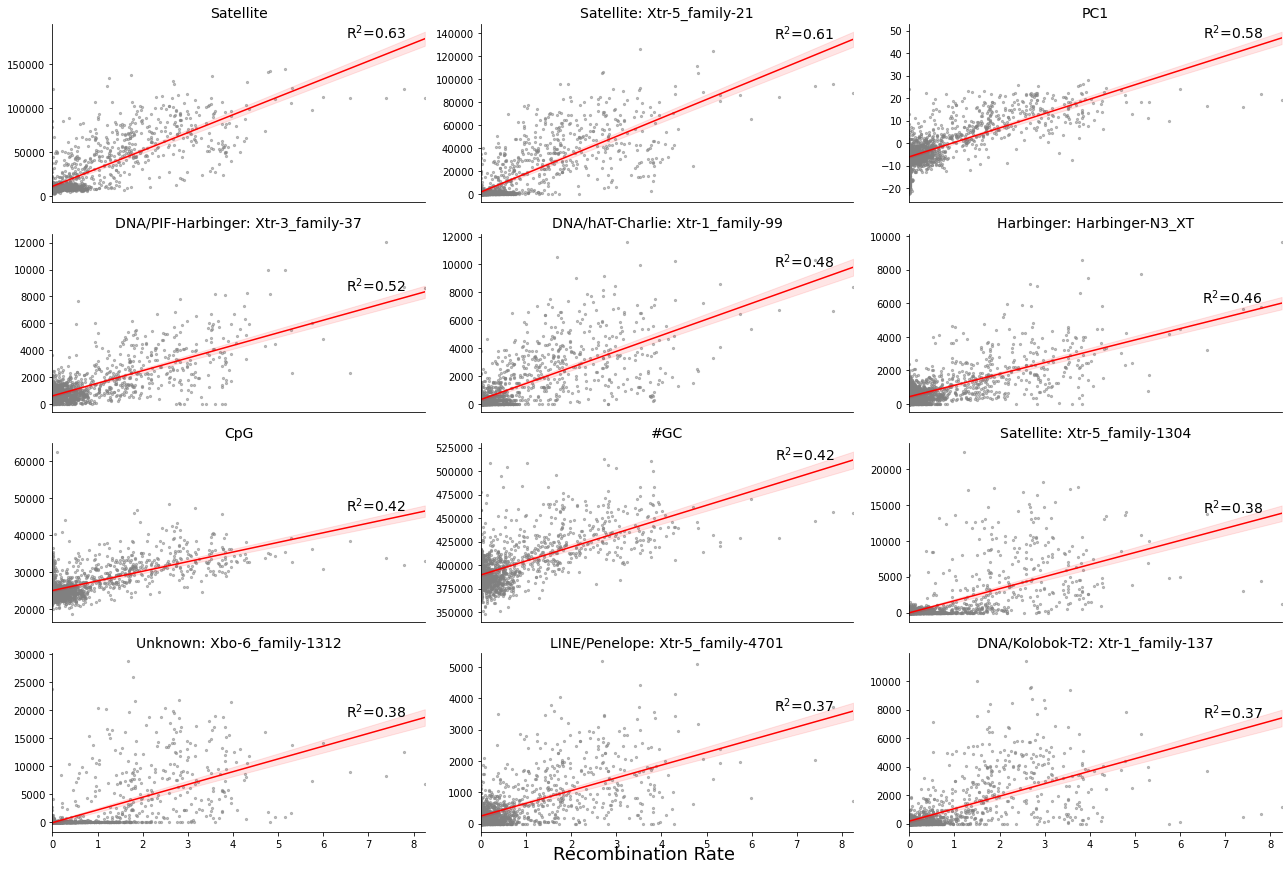

()

In [16]:
#Supplementary Figure 12a
import statsmodels.api as sm


def plot_correlations_with_RecombinationRates(list_Yaxis, x_axis_name, out_fig_name):
    n_cols = 3
    n_rows = len(list_Yaxis)/n_cols
    if np.mod(len(list_Yaxis),n_cols):
        n_rows = n_rows +1
        
    fig = plt.figure(figsize=(18,n_rows*3))
    fig.subplots_adjust(hspace=0.25, wspace=0.25)
    
    if x_axis_name == '':
        x_axis_name = 'Smooth_Recombination_Rate'
        X = np.array(RR_CM_PC_OF['Smooth_Recombination_Rate'])
        x_axis_label = 'Recombination Rate'
    else:
        X = np.array(RR_CM_PC_OF[x_axis_name])
        x_axis_label = x_axis_name
        
    for i in range(0, len(list_Yaxis)):
        ax = fig.add_subplot(int(n_rows), int(n_cols), i+1)
        
        y_name = list_Yaxis[i]
        Y = np.array(RR_CM_PC_OF[y_name])
        
        results = sm.OLS(Y,sm.add_constant(X)).fit()
        X_plot = np.linspace(min(X),max(X),1000)
        Y_plot = X_plot*results.params[1] + results.params[0]
        ax.scatter(X,Y,s=5, alpha=0.5,color='gray')
        ax.plot(X_plot, Y_plot, color='red')
        ax.fill_between(X_plot, X_plot*results.conf_int(0.05)[1][0]+ results.conf_int(0.05)[0][0],X_plot*results.conf_int(0.05)[1][1]+ results.conf_int(0.05)[0][1], color='red', alpha=0.1)        
        R_value = ''.join(("R^2=",str(results.rsquared_adj)[:4]))
               
        if y_name == 'GC_':
            y_name = '#GC'
        
        ax.set_title(''.join((y_name)), fontsize=14)
        ax.set_xlim(min(X), max(X))
        #ax.set_ylim(max(0, min(Y_plot)*.8), max(Y_plot)*1.2)
   ##new     ax.set_ylim( min(Y_plot), max(Y_plot)*1.2)
        ax.text(max(X)*.95,max(Y_plot), ''.join(("R$^2$=",str(results.rsquared_adj)[:4])),fontsize=14, ha='right')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        if i < n_rows * n_cols - n_cols :
            ax.get_xaxis().set_ticks([])
    plt.figtext(0.5,0.0,x_axis_label, ha='center', fontsize=18)
    plt.tight_layout()
    print("Saved as", out_fig_name)
    plt.savefig(out_fig_name,bbox_inches='tight', transparent=True,)
    plt.show()
    return()



RR_CM = pd.merge(Motifs_and_Classes,  Rec_rate[~Rec_rate.Smooth_Recombination_Rate.isnull()][['Chr','Pos','Start','Smooth_Recombination_Rate']], right_on=['Chr','Pos'], left_on=['Chr','Start'])
RR_CM_PC = pd.merge(RR_CM, principalDf,  left_on=['Chr','Start_x'],   right_on=['Chr','Start'])
RR_CM_PC_OF = pd.merge(RR_CM_PC, OtherFeatures,  left_on=['Chr','Start'],   right_on=['Chr','position'])
RR_CM_PC_OF['Centromere'] = RR_CM_PC_OF.REGION_PCA2.apply(lambda x: 'Centromere' if x=='Peri-Centromere' else 'Arm')
RR_CM_PC_OF['Subtelomere'] =  RR_CM_PC_OF.REGION_PCA2.apply(lambda x: 'Subtelomere' if 'Subtelomere' in x else 'Arm')
RR_CM_PC_OF['log10(distance from telomere)'] = np.log10(RR_CM_PC_OF['Start_x']/Mb)
for Chr_ in chr_sizes.Chr.to_list():
    chr_size = chr_sizes[chr_sizes.Chr==Chr_].Length.to_list()[0]
    RR_CM_PC_OF.loc[(RR_CM_PC_OF.Chr==Chr_) & (RR_CM_PC_OF.Start_x<chr_size/2), 'log10(distance from telomere)'] = np.log10((chr_size- RR_CM_PC_OF[(RR_CM_PC_OF.Chr==Chr_) & (RR_CM_PC_OF.Start_x<chr_size/2)].Start_x)/Mb)
RR_CM_PC_OF.head()

Rec_Rate_correlations_with_other_features  = RR_CM_PC_OF.corr(method='pearson')['Smooth_Recombination_Rate'].sort_values()

Rec_rate_correlations_dict = Rec_Rate_correlations_with_other_features.to_dict()


list_Yaxis =  Rec_Rate_correlations_with_other_features[(Rec_Rate_correlations_with_other_features>.5 )& (Rec_Rate_correlations_with_other_features<1)].tail(12).index.to_list()[::-1]
list_Yaxis =  ['Satellite','Satellite: Xtr-5_family-21'] + Rec_Rate_correlations_with_other_features[Rec_Rate_correlations_with_other_features>0][::-1][4:14].index.to_list()

out_fig_name = os.path.join(paths_files_fig_12 sup_fig_12+'a.pdf')
plot_correlations_with_RecombinationRates(list_Yaxis,'', out_fig_name)


In [17]:
out_table_name = os.path.join(paths_files_fig_12,sup_fig_12+'a__Correlation_Recombination_and_RepeatDensity.tab'))
RR_CM_PC_OF[['Smooth_Recombination_Rate']+list_Yaxis].to_csv(out_table_name,sep='\t')
print(out_table_name)

SourceData/Supplementary_Fig.12/FigS12a__Correlation_Recombination_and_RepeatDensity.tab


In [18]:
JC_medians = Repeat_Maker_with_JC_withClass.groupby('Motif').JC.median().to_dict()

dict_Motif_to_Classification = Repeat_Maker_with_JC_withClass[~(Repeat_Maker_with_JC_withClass.Class=='Unknown')][['Motif','Classification']].drop_duplicates().set_index('Motif').to_dict(orient='index')
dict_Motif_to_New_Subtype = Repeat_Maker_with_JC_withClass[~(Repeat_Maker_with_JC_withClass.Class=='Unknown')][['Motif','New_Subtype']].drop_duplicates().set_index('Motif').to_dict(orient='index')
dict_Motif_to_value_counts = Repeat_Maker_with_JC_withClass.Motif.value_counts().to_dict()
dict_Class_to_value_counts = Repeat_Maker_with_JC_withClass.Class.value_counts().to_dict()

In [19]:
#### Enrichments


Mean_Rep_Densities = CM_PC_OF[~(CM_PC_OF.Chr.isin(['Chr3','Chr8']))].groupby('Centromere').mean().T.sort_values('Centromere', ascending=False)
Mean_Rep_Densities['Cent_Enrich'] = Mean_Rep_Densities['Centromere']/((Mean_Rep_Densities['Centromere'] + Mean_Rep_Densities['Arm']))#+ Mean_Rep_Densities['Subtelomere-p'] + Mean_Rep_Densities['Subtelomere-q']))
Mean_Rep_Densities = Mean_Rep_Densities.reset_index()
Mean_Rep_Densities['Mean_JC'] = Mean_Rep_Densities['index'].apply(lambda x: JC_medians[x] if x in JC_medians.keys() else 'NA')
Mean_Rep_Densities['Classification'] = Mean_Rep_Densities['index'].apply(lambda x: dict_Motif_to_Classification[x]['Classification'] if x in dict_Motif_to_Classification.keys() else 'Unknown')
Mean_Rep_Densities['New_Subtype'] = Mean_Rep_Densities['index'].apply(lambda x: dict_Motif_to_New_Subtype[x]['New_Subtype'] if x in dict_Motif_to_Classification.keys() else 'Unknown')
Mean_Rep_Densities.head()


Mean_Rep_Densities_subtel = CM_PC_OF.groupby('Subtelomere').mean().T.sort_values('Subtelomere', ascending=False)
Mean_Rep_Densities_subtel['Subtel_Enrich'] = Mean_Rep_Densities_subtel['Subtelomere']/((Mean_Rep_Densities_subtel['Subtelomere'] + Mean_Rep_Densities_subtel['Arm']))#+ Mean_Rep_Densities['Subtelomere-p'] + Mean_Rep_Densities['Subtelomere-q']))
Mean_Rep_Densities_subtel = Mean_Rep_Densities_subtel.reset_index()
Mean_Rep_Densities_subtel['Mean_JC'] = Mean_Rep_Densities_subtel['index'].apply(lambda x: JC_medians[x] if x in JC_medians.keys() else 'NA')
Mean_Rep_Densities_subtel['Classification'] = Mean_Rep_Densities_subtel['index'].apply(lambda x: dict_Motif_to_Classification[x]['Classification'] if x in dict_Motif_to_Classification.keys() else 'Unknown')
Mean_Rep_Densities_subtel['New_Subtype'] = Mean_Rep_Densities_subtel['index'].apply(lambda x: dict_Motif_to_New_Subtype[x]['New_Subtype'] if x in dict_Motif_to_Classification.keys() else 'Unknown')
Mean_Rep_Densities_subtel.head()


Mean_Rep_Densities_arms = CM_PC_OF.groupby('Arm').mean().T.sort_values('Arm', ascending=False)
Mean_Rep_Densities_arms['Arm_Enrich'] = Mean_Rep_Densities_arms['Arm']/((Mean_Rep_Densities_arms['Arm'] + Mean_Rep_Densities_arms['No-Arm']))#+ Mean_Rep_Densities['Subtelomere-p'] + Mean_Rep_Densities['Subtelomere-q']))
Mean_Rep_Densities_arms = Mean_Rep_Densities_arms.reset_index()
Mean_Rep_Densities_arms['Mean_JC'] = Mean_Rep_Densities_arms['index'].apply(lambda x: JC_medians[x] if x in JC_medians.keys() else 'NA')
Mean_Rep_Densities_arms['Classification'] = Mean_Rep_Densities_arms['index'].apply(lambda x: dict_Motif_to_Classification[x]['Classification'] if x in dict_Motif_to_Classification.keys() else 'Unknown')
Mean_Rep_Densities_arms['New_Subtype'] = Mean_Rep_Densities_arms['index'].apply(lambda x: dict_Motif_to_New_Subtype[x]['New_Subtype'] if x in dict_Motif_to_Classification.keys() else 'Unknown')
Mean_Rep_Densities_arms.head()

### Motif for paper - enrichment table.
Tot_sum = pd.DataFrame(Repeat_Maker_with_JC_withClass.groupby('Motif').Length.sum())
Tot_sum = Tot_sum.rename(columns={'Length':'TotalSum'})
A = pd.merge(Mean_Rep_Densities_subtel[['index','Subtel_Enrich','Subtelomere']],Mean_Rep_Densities_arms[['Arm_Enrich','Arm','index']], left_on=['index'], right_on=['index'])
B = pd.merge(A,Mean_Rep_Densities, left_on=['index'], right_on=['index'])
B = B[['Classification','New_Subtype','index','Centromere','Subtelomere','Arm_x','Cent_Enrich','Subtel_Enrich','Arm_Enrich','Mean_JC']]
B = pd.merge( B,Tot_sum, left_on='index',right_index=True , how='left')
B = B[~ B['index'].isin(['Start','position'])]
B['Pearson corr w/ Rec. Rate'] = B['index'].apply(lambda x: Rec_rate_correlations_dict[x])

B = B.set_index('index')
B = B.rename(columns={'Arm_x':'MeanDensity: Arm','Centromere':'MeanDensity: Pericentromere','Subtelomere':'MeanDensity: Subtelomere','Cent_Enrich':'%Pericentromere','Subtel_Enrich':'%Subtelomere','Arm_Enrich':'%Arm','Mean_JC':'Median JC distance'})
B.head()

import copy
Summary_table  = B[['Pearson corr w/ Rec. Rate','Classification','New_Subtype','Median JC distance','MeanDensity: Pericentromere','MeanDensity: Subtelomere','MeanDensity: Arm','%Pericentromere','%Subtelomere','%Arm','TotalSum']]
Summary_table = pd.merge(Summary_table, PCA_component_loadings[['PC1','PC2','PC3']], left_index=True, right_index=True, how='left')
Summary_table.loc[~ (Summary_table['Median JC distance']=='NA'), 'Tot_counts'] = Summary_table.loc[~ (Summary_table['Median JC distance']=='NA')].index.to_series().apply(lambda x: dict_Motif_to_value_counts[x])
Summary_table.loc[Summary_table.index.isin(Classes.columns[2:]), 'Tot_counts'] = Summary_table[Summary_table.index.isin(Classes.columns[2:])].index.to_series().apply(lambda x: dict_Class_to_value_counts[x])
Summary_table.head(20)


Pearson corr w/ Rec. Rate  Classification  \
index                                                                   
Midpoint                                    -0.105551         Unknown   
AT_                                         -0.633085         Unknown   
GC_                                          0.649433         Unknown   
CpG_ctrl                                     0.443588         Unknown   
Satellite                                    0.794543         Unknown   
CpG                                          0.654603         Unknown   
DNA/Kolobok-T2                              -0.073420         Unknown   
hAT                                          0.419675         Unknown   
LINE/CR1                                    -0.202641         Unknown   
LTR/Gypsy                                    0.159497         Unknown   
DNA/PIF-Harbinger                           -0.007165         Unknown   
Kolobok                                     -0.054764         Unknown   
piggyBac                                    -0.241714         Unknown   
Satellite: Xtr-5_family-21                   0.783498  Tandem Repeats   
Simple_repeat                                0.369142         Unknown   
N                                            0.029435         Unknown   
Gypsy                                       -0.150076         Unknown   
CR1                                         -0.281851         Unknown   
DNA/hAT-Tip100                               0.234677         Unknown   
Harbinger                                   -0.253719         Unknown   

                           New_Subtype Median JC distance  \
index                                                       
Midpoint                       Unknown                 NA   
AT_                            Unknown                 NA   
GC_                            Unknown                 NA   
CpG_ctrl                       Unknown                 NA   
Satellite                      Unknown                 NA   
CpG                            Unknown                 NA   
DNA/Kolobok-T2                 Unknown                 NA   
hAT                            Unknown                 NA   
LINE/CR1                       Unknown                 NA   
LTR/Gypsy                      Unknown                 NA   
DNA/PIF-Harbinger              Unknown                 NA   
Kolobok                        Unknown                 NA   
piggyBac                       Unknown                 NA   
Satellite: Xtr-5_family-21   Satellite           0.092115   
Simple_repeat                  Unknown                 NA   
N                              Unknown                 NA   
Gypsy                          Unknown                 NA   
CR1                            Unknown                 NA   
DNA/hAT-Tip100                 Unknown                 NA   
Harbinger                      Unknown                 NA   

                            MeanDensity: Pericentromere  \
index                                                     
Midpoint                                   6.261039e+07   
AT_                                        5.962934e+05   
GC_                                        4.032865e+05   
CpG_ctrl                                   9.026054e+04   
Satellite                                  9.191337e+03   
CpG                                        2.982724e+04   
DNA/Kolobok-T2                             3.783300e+04   
hAT                                        3.045032e+04   
LINE/CR1                                   5.181393e+04   
LTR/Gypsy                                  1.909392e+04   
DNA/PIF-Harbinger                          3.275101e+04   
Kolobok                                    1.464767e+04   
piggyBac                                   4.990583e+04   
Satellite: Xtr-5_family-21                 5.658351e+02   
Simple_repeat                              5.275695e+03   
N                                          8.401792e+02   
Gypsy           

## Supplementary Fig. 5c,d: PCA on repeat densities and repeat distribution.

Saved as SourceData/Xtropicalis_Repeat_Landscape_wOrange.pdf


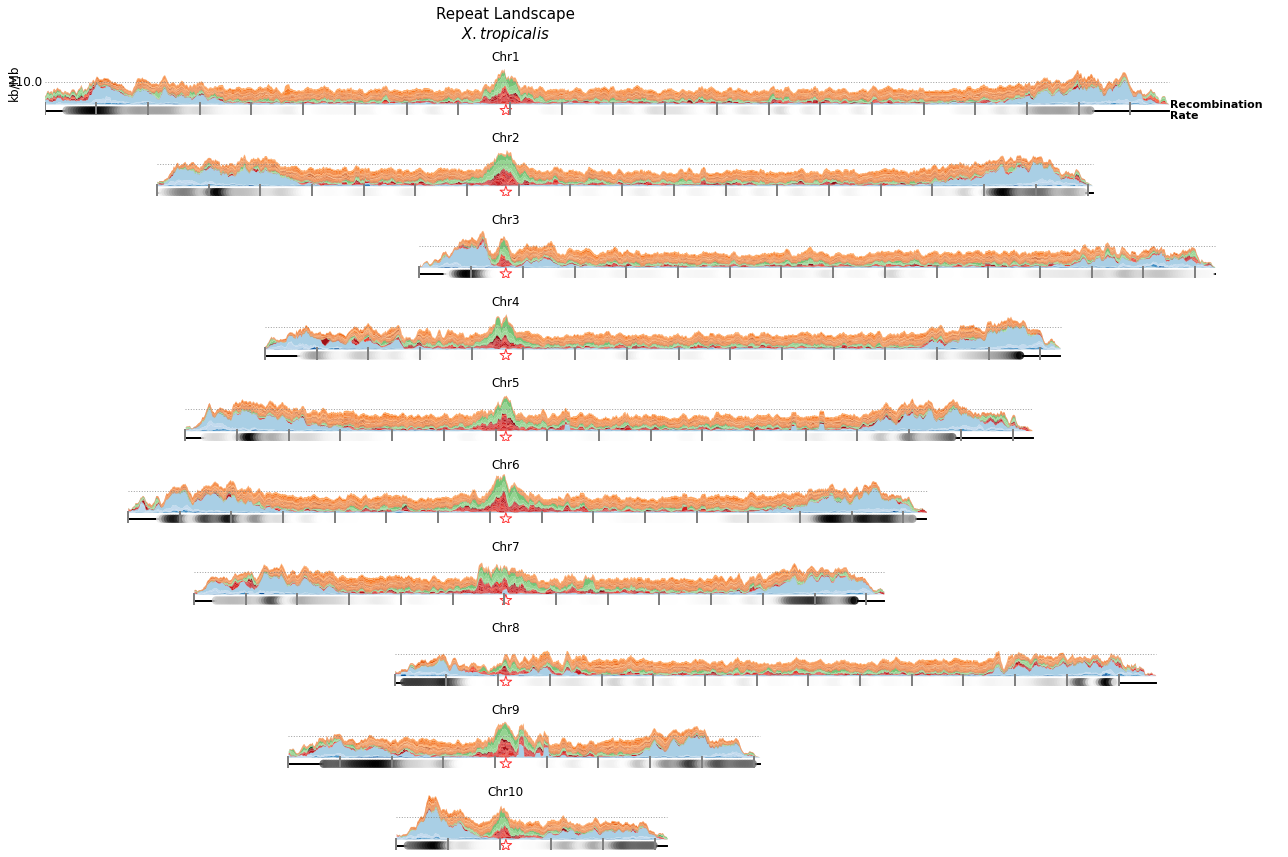

()

In [22]:
# Selection Repeats to plot:
dictionary_input = dict()
dictionary_input['Reds'] = Repeat_Maker_with_JC[Repeat_Maker_with_JC.Class=='L1'].Motif.value_counts().index.to_list()
dictionary_input['Blues'] = Repeat_Maker_with_JC[Repeat_Maker_with_JC.Motif.str.startswith('Satellite: Xtr')].Motif.value_counts().index.to_list()
dictionary_input['Oranges'] = Summary_table[Summary_table.Classification=='DNA Transposon'].sort_values('PC2').index.to_list()[:45]
dictionary_input['Greens'] = Repeat_Maker_with_JC[(Repeat_Maker_with_JC.Class=='CR1') & ~(Repeat_Maker_with_JC.Motif.str.endswith('XL'))].Motif.value_counts().index.to_list()
Repeat_colors_dict, Repeats_ordered_by_JC = assign_colors(dictionary_input, Repeat_Maker_with_JC, Motifs)

import json
with open(os.path.join(paths_files_fig_12,"dictionary_input.json"),'w') as f:
    json.dump(dictionary_input, f)

# Supplementary Figure 5c
motifs_to_plot =  Repeats_ordered_by_JC['Blues'] +Repeats_ordered_by_JC['Reds']+  Repeats_ordered_by_JC['Greens'] + Repeats_ordered_by_JC['Oranges']
max_y_value =  220000
title = 'Repeat Landscape\n$X. tropicalis$'
Specie_name = 'Xtropicalis'
out_fig_name = os.path.join(out_dir_figs, Specie_name+'_Repeat_Landscape_wOrange.pdf')
spatial_distibution_repeatsLenght_vs_JCdistance_v3(Motifs, motifs_to_plot, Repeat_colors_dict, Xtrop_centromere_positon,chr_sizes_xtr, title, max_y_value, out_fig_name,Rec_rate,False)


In [21]:
out_table_name = os.path.join(paths_files_fig_12, sup_fig_12+'a__Summary_table.tab')
Summary_table.to_csv(out_table_name, sep='\t')
print(out_table_name)

SourceData/Supplementary_Fig.12/FigS12a__Summary_table.tab


In [13]:
# Supplementary Figure 5d
#out_fig_name_JC = 'Test.pdf'
out_fig_name_JC = out_fig_name.replace('.pdf','_JC_Subtelomeric_Sat.pdf')
print(out_fig_name_JC)
histogram_repeats_Motif_v3(Repeats_ordered_by_JC['Blues'],Repeat_colors_dict,'Subtelomeric (Satellite)',out_fig_name_JC)
out_fig_name_JC = out_fig_name.replace('.pdf','_JC_Pericentromeric_L1.pdf')
print(out_fig_name_JC)
histogram_repeats_Motif_v3(Motifs_and_Classes[Repeats_ordered_by_JC['Reds']].sum().sort_values(ascending=False).index.to_list()[:24],Repeat_colors_dict,'Pericentromeric (Non-LTR retrotransposons)',out_fig_name_JC)
out_fig_name_JC = out_fig_name.replace('.pdf','_JC_Pericentromeric_CR1.pdf')
print(out_fig_name_JC)
histogram_repeats_Motif_v3(Motifs_and_Classes[Repeats_ordered_by_JC['Greens']].sum().sort_values(ascending=False).index.to_list()[:24],Repeat_colors_dict,'Pericentromeric (Non-LTR retrotransposons)',out_fig_name_JC)
out_fig_name_JC = out_fig_name.replace('.pdf','_JC_Arms_DNA.pdf')
print(out_fig_name_JC)
histogram_repeats_Motif_v3(Repeats_ordered_by_JC['Oranges'][:20],Repeat_colors_dict,'Arms (DNA transposons)',out_fig_name_JC)

### About centromeres:
# CR1, Gypsy,BEL are elements found  in pericentromeric regions of Drosophila {Bracewell, 2019}. There regions are silenced?
# There is evidence of expression of endogenous retrovirus localized in the pericentromeres of modern humans {Zahn, 2015}.
#KEEP Figure SE # DONE! : .../X_tropicalis_V10Final/IGC_7/Final Files/Figures/December2019_Figures/Used/Final/Figure\ SE

NameError: name 'Repeats_ordered_by_JC' is not defined